<a href="https://colab.research.google.com/github/Pasindu-Madhuwantha/Text-Analytics-Model-Comparison/blob/main/CMM706_%E2%80%93_Coursework_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### CMM706 – Coursework 1
#### July 2025

Name  :  Pasindu Madhuwantha|
IIT ID:  pasindu.20250028@iit.ac.lk|
RGU ID:  p.madawala-gamage@rgu.ac.uk





```
# This is formatted as code
```

#Answer to Task 1


#Step *1*  - Load and Inspect the Raw Data

In [ ]:
import pandas as pd

# Load the CSV file
df = pd.read_csv("/content/drive/MyDrive/Hotel Reviews Data.csv")  # replace with actual filename

# Preview the dataset
print(df.head())
print(df.info())


        Hotel Name                                        Review Body  Rating
0  Fairway Colombo  Everything very good , best crew , good servic...     5.0
1  Fairway Colombo  Great beds and super friendly staff, just were...     5.0
2  Fairway Colombo  Excellent service at Fairyway colombo The room...     5.0
3  Fairway Colombo  Very accommodating and clean. Recommended to e...     5.0
4  Fairway Colombo  We just stayed for a night. The Rooms are dece...     3.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7637 entries, 0 to 7636
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Hotel Name   7637 non-null   object 
 1   Review Body  7637 non-null   object 
 2   Rating       7636 non-null   float64
dtypes: float64(1), object(2)
memory usage: 179.1+ KB
None


#Step *2* -Clean the Data

In [ ]:
# Drop rows with missing reviews or ratings
df = df.dropna(subset=['Review Body', 'Rating'])

# Convert ratings to integers (if needed)
df['Rating'] = df['Rating'].astype(int)

# Remove duplicates
df = df.drop_duplicates()

# Clean whitespace
df['Review Body'] = df['Review Body'].str.strip()


/tmp/ipython-input-28-514636382.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Rating'] = df['Rating'].astype(int)


#Step 3 - Describe the Raw and Cleaned Dataset

In [ ]:
# Number of hotels
num_hotels = df['Hotel Name'].nunique()

# Reviews per hotel
reviews_per_hotel = df['Hotel Name'].value_counts()

# Total number of reviews
total_reviews = len(df)

# Word count in each review
df['Word Count'] = df['Review Body'].apply(lambda x: len(str(x).split()))

# Total words in the entire corpus
total_words = df['Word Count'].sum()

# Unique words
from collections import Counter
import nltk
nltk.download('punkt')

all_words = ' '.join(df['Review Body'].astype(str)).lower().split()
unique_words = set(all_words)

print(f"Number of Hotels: {num_hotels}")
print(f"Total Reviews: {total_reviews}")
print(f"Total Words: {total_words}")
print(f"Unique Words: {len(unique_words)}")


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Number of Hotels: 100
Total Reviews: 7629
Total Words: 704698
Unique Words: 35187


#Step 4 - Histogram of Review Lengths

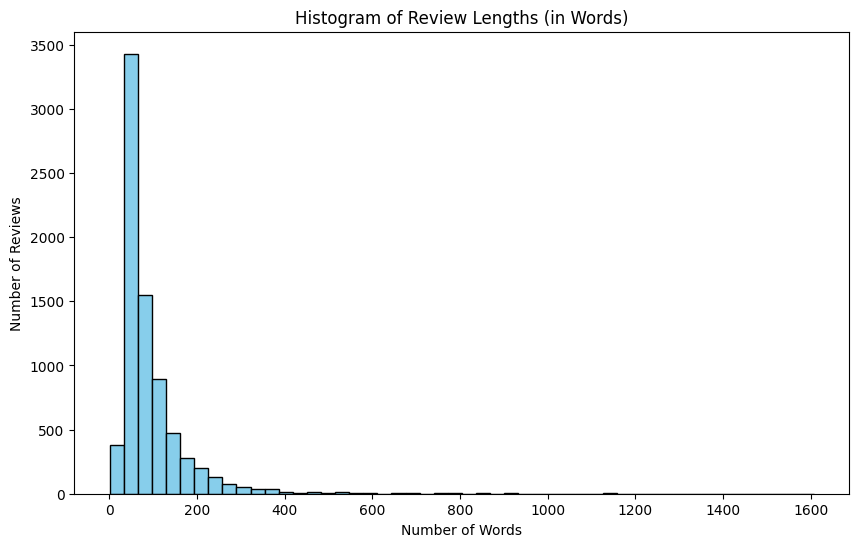

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
df['Word Count'].hist(bins=50, color='skyblue', edgecolor='black')
plt.title('Histogram of Review Lengths (in Words)')
plt.xlabel('Number of Words')
plt.ylabel('Number of Reviews')
plt.grid(False)
plt.show()


#Step 5 - EDA Ideas

Rating Distribution:

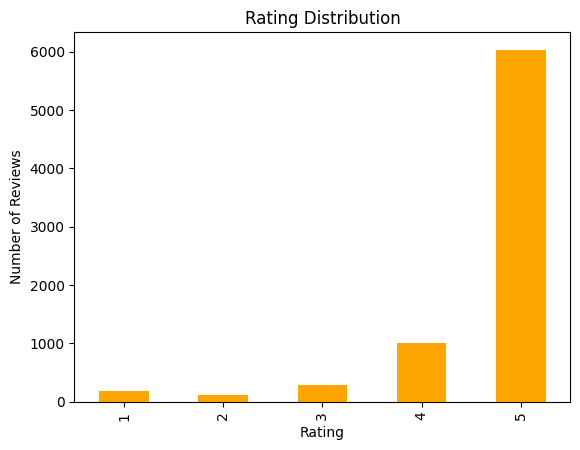

In [ ]:
df['Rating'].value_counts().sort_index().plot(kind='bar', color='orange')
plt.title('Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Number of Reviews')
plt.show()


Top 10 Most Reviewed Hotels

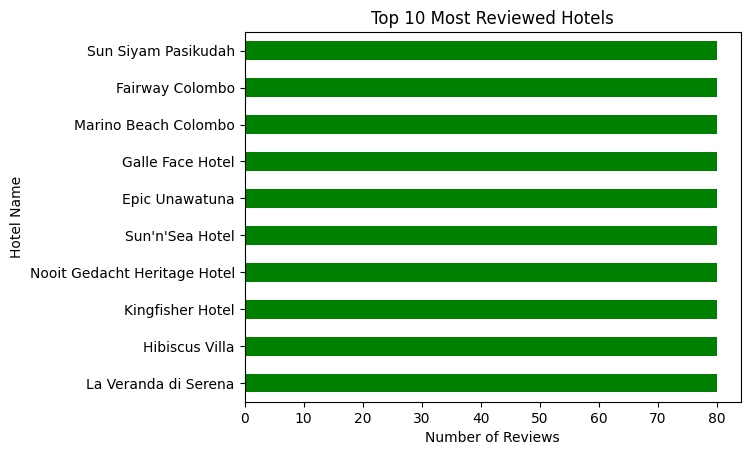

In [ ]:
reviews_per_hotel.head(10).plot(kind='barh', color='green')
plt.title('Top 10 Most Reviewed Hotels')
plt.xlabel('Number of Reviews')
plt.gca().invert_yaxis()
plt.show()


Average Review Length per Hotel

In [ ]:
avg_length = df.groupby('Hotel Name')['Word Count'].mean().sort_values(ascending=False)
print(avg_length)

Hotel Name
Joes Resort Unawatuna         153.925000
Beach Grove Villas            149.250000
Good Vibes Villas Retreat     143.275000
Villa Gaetano                 140.112500
Thambapanni Retreat           134.325000
                                 ...    
Araliya Beach Resort & Spa     57.012500
Radisson Hotel Colombo         56.125000
Ramada by Wyndham Colombo      55.750000
Sheraton Colombo Hotel         55.582278
Port View City Hotel           53.687500
Name: Word Count, Length: 100, dtype: float64


#Answer to Task 2


###Step 1

In [ ]:
pip install nltk textblob transformers torch

###Step 2: Import and Prepare

In [ ]:
import pandas as pd
import nltk
from textblob import TextBlob
from nltk.sentiment import SentimentIntensityAnalyzer
from transformers import pipeline

# Download VADER lexicon
nltk.download('vader_lexicon')

# Load your dataset
df = pd.read_csv("/content/drive/MyDrive/Hotel Reviews Data.csv")
df = df.dropna(subset=['Review Body']).copy()


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


###Step 3: Apply the 3 Sentiment Classifiers

1. VADER (Lexicon-based)

In [ ]:
sia = SentimentIntensityAnalyzer()

def vader_sentiment(text):
    score = sia.polarity_scores(text)['compound']
    if score >= 0.05:
        return 'positive'
    elif score <= -0.05:
        return 'negative'
    else:
        return 'neutral'

df['VADER'] = df['Review Body'].apply(vader_sentiment)


2. TextBlob

In [ ]:
def textblob_sentiment(text):
    score = TextBlob(text).sentiment.polarity
    if score > 0.05:
        return 'positive'
    elif score < -0.05:
        return 'negative'
    else:
        return 'neutral'

df['TextBlob'] = df['Review Body'].apply(textblob_sentiment)


 3. Transformer-based Model (HuggingFace)

In [ ]:
from transformers import pipeline
import torch

# Load the model
classifier = pipeline("sentiment-analysis", model="distilbert-base-uncased-finetuned-sst-2-english")

def transformer_sentiment(text):
    result = classifier(text[:512])[0]  # Truncate to 512 tokens
    return 'positive' if result['label'] == 'POSITIVE' else 'negative'

df['Transformer'] = df['Review Body'].apply(transformer_sentiment)


Device set to use cuda:0


###Step 4: Majority Voting

In [ ]:
from collections import Counter

def majority_vote(row):
    votes = [row['VADER'], row['TextBlob'], row['Transformer']]
    most_common = Counter(votes).most_common(1)[0][0]
    return most_common

df['Final Sentiment'] = df.apply(majority_vote, axis=1)


###Step 5: Analyze the Results

In [ ]:
print(df['Final Sentiment'].value_counts())

# Optional: Save the dataset with labels
df.to_csv("labeled_reviews.csv", index=False)


Final Sentiment
positive    7391
negative     232
neutral       14
Name: count, dtype: int64


#Answer to Task 3

 Step 1: Sparse Vector Representations

1.1: CountVectorizer (Bag of Words)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

count_vec = CountVectorizer(max_features=1000)  # Top 1000 frequent words
X_count = count_vec.fit_transform(df['Review Body'])

print("CountVectorizer shape:", X_count.shape)


CountVectorizer shape: (7637, 1000)


✅ Justification: CountVectorizer captures term frequency. Simple, interpretable, and fast.

1.2: TF-IDF Vectorizer

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vec = TfidfVectorizer(max_features=1000)
X_tfidf = tfidf_vec.fit_transform(df['Review Body'])

print("TF-IDF shape:", X_tfidf.shape)


TF-IDF shape: (7637, 1000)


✅ Justification: TF-IDF gives more weight to informative words. It downweighs common words.

Step 2: Dense Vector Representations

2.1: Doc2Vec (using Gensim)

In [ ]:
#pip install gensim

In [ ]:
import gensim
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

# Prepare tagged documents
documents = [TaggedDocument(words=str(row).lower().split(), tags=[i]) for i, row in enumerate(df['Review Body'])]

# Train a Doc2Vec model
model = Doc2Vec(documents, vector_size=100, window=5, min_count=2, workers=4, epochs=20)

# Generate dense vectors for each document
X_doc2vec = [model.infer_vector(doc.words) for doc in documents]

import numpy as np
X_doc2vec = np.array(X_doc2vec)

print("Doc2Vec shape:", X_doc2vec.shape)


Doc2Vec shape: (7637, 100)


✅ Justification: Doc2Vec captures semantic meaning of the full document in a dense 100-d vector. Good for deep models.

2.2: Average Word2Vec (Gensim Pre-trained)

In [ ]:
import gensim.downloader as api

# Load pre-trained Word2Vec (Google News or Glove)
w2v_model = api.load("glove-wiki-gigaword-100")  # Vector size = 100

# Function to average word embeddings
def avg_w2v(text):
    words = str(text).lower().split()
    vecs = [w2v_model[word] for word in words if word in w2v_model]
    return np.mean(vecs, axis=0) if vecs else np.zeros(100)

X_avgw2v = np.vstack(df['Review Body'].apply(avg_w2v).values)

print("Average Word2Vec shape:", X_avgw2v.shape)


Average Word2Vec shape: (7637, 100)


✅ Justification: Averaging word vectors creates a smooth, compact representation of text. Fast and effective for many tasks.

#Answer to Task 4

Step 1: Summary of Feature Types

In [ ]:
y = df['Final Sentiment']  # Sentiment labels: positive, negative, neutral
print(y.value_counts())

Final Sentiment
positive    7391
negative     232
neutral       14
Name: count, dtype: int64


Step 2: Choose 3 Non-Deep Learning Classifiers

| Model                       | Type                  | Why it’s chosen                |
| --------------------------- | --------------------- | ------------------------------ |
| **Multinomial Naive Bayes** | Probabilistic, fast   | Best with sparse count/TF-IDF  |
| **Logistic Regression**     | Linear, interpretable | Handles sparse + dense, stable |
| **Random Forest**           | Ensemble, non-linear  | Handles complex data patterns  |


Step 3: Training + Evaluation Pipeline

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

def evaluate_model(X, y, model, model_name, feature_name):
    print(f"\n🔹 Evaluating {model_name} with {feature_name} features")

    # Train/Test Split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Fit and Predict
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Metrics
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


 Step 4: Run Models on All Feature Sets

Sparse Features:

In [ ]:
# Naive Bayes works best with count/tfidf (not with dense vectors!)
evaluate_model(X_count, y, MultinomialNB(), "MultinomialNB", "CountVectorizer")
evaluate_model(X_tfidf, y, MultinomialNB(), "MultinomialNB", "TF-IDF")
evaluate_model(X_count, y, LogisticRegression(max_iter=1000), "Logistic Regression", "CountVectorizer")
evaluate_model(X_tfidf, y, LogisticRegression(max_iter=1000), "Logistic Regression", "TF-IDF")
evaluate_model(X_count, y, RandomForestClassifier(), "Random Forest", "CountVectorizer")
evaluate_model(X_tfidf, y, RandomForestClassifier(), "Random Forest", "TF-IDF")



🔹 Evaluating MultinomialNB with CountVectorizer features
              precision    recall  f1-score   support

    negative       0.44      0.88      0.59        50
     neutral       0.00      0.00      0.00         4
    positive       0.99      0.96      0.98      1474

    accuracy                           0.96      1528
   macro avg       0.48      0.61      0.52      1528
weighted avg       0.97      0.96      0.96      1528

Confusion Matrix:
 [[  44    0    6]
 [   2    0    2]
 [  53    1 1420]]

🔹 Evaluating MultinomialNB with TF-IDF features
              precision    recall  f1-score   support

    negative       0.00      0.00      0.00        50
     neutral       0.00      0.00      0.00         4
    positive       0.96      1.00      0.98      1474

    accuracy                           0.96      1528
   macro avg       0.32      0.33      0.33      1528
weighted avg       0.93      0.96      0.95      1528

Confusion Matrix:
 [[   0    0   50]
 [   0    0    4]
 [

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

              precision    recall  f1-score   support

    negative       0.74      0.56      0.64        50
     neutral       0.00      0.00      0.00         4
    positive       0.98      0.99      0.99      1474

    accuracy                           0.98      1528
   macro avg       0.57      0.52      0.54      1528
weighted avg       0.97      0.98      0.97      1528

Confusion Matrix:
 [[  28    0   22]
 [   1    0    3]
 [   9    0 1465]]

🔹 Evaluating Logistic Regression with TF-IDF features
              precision    recall  f1-score   support

    negative       0.84      0.32      0.46        50
     neutral       0.00      0.00      0.00         4
    positive       0.97      1.00      0.99      1474

    accuracy                           0.97      1528
   macro avg       0.61      0.44      0.48      1528
weighted avg       0.97      0.97      0.97      1528

Confusion Matrix:
 [[  16    0   34]
 [   0    0    4]
 [   3    0 1471]]

🔹 Evaluating Random Forest with Co

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

    negative       0.00      0.00      0.00        50
     neutral       0.00      0.00      0.00         4
    positive       0.96      1.00      0.98      1474

    accuracy                           0.96      1528
   macro avg       0.32      0.33      0.33      1528
weighted avg       0.93      0.96      0.95      1528

Confusion Matrix:
 [[   0    0   50]
 [   0    0    4]
 [   1    0 1473]]

🔹 Evaluating Random Forest with TF-IDF features
              precision    recall  f1-score   support

    negative       0.00      0.00      0.00        50
     neutral       0.00      0.00      0.00         4
    positive       0.96      1.00      0.98      1474

    accuracy                           0.96      1528
   macro avg       0.32      0.33      0.33      1528
weighted avg       0.93      0.96      0.95      1528

Confusion Matrix:
 [[   0    0   50]
 [   0    0    4]
 [   0    0 1474]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Dense Features:

In [ ]:
evaluate_model(X_doc2vec, y, LogisticRegression(max_iter=1000), "Logistic Regression", "Doc2Vec")
evaluate_model(X_avgw2v, y, LogisticRegression(max_iter=1000), "Logistic Regression", "AvgWord2Vec")
evaluate_model(X_doc2vec, y, RandomForestClassifier(), "Random Forest", "Doc2Vec")
evaluate_model(X_avgw2v, y, RandomForestClassifier(), "Random Forest", "AvgWord2Vec")



🔹 Evaluating Logistic Regression with Doc2Vec features
              precision    recall  f1-score   support

    negative       0.63      0.34      0.44        50
     neutral       0.00      0.00      0.00         4
    positive       0.98      0.99      0.98      1474

    accuracy                           0.97      1528
   macro avg       0.54      0.44      0.48      1528
weighted avg       0.96      0.97      0.96      1528

Confusion Matrix:
 [[  17    0   33]
 [   1    0    3]
 [   9    1 1464]]

🔹 Evaluating Logistic Regression with AvgWord2Vec features


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

    negative       0.82      0.28      0.42        50
     neutral       0.00      0.00      0.00         4
    positive       0.97      1.00      0.99      1474

    accuracy                           0.97      1528
   macro avg       0.60      0.43      0.47      1528
weighted avg       0.97      0.97      0.96      1528

Confusion Matrix:
 [[  14    0   36]
 [   0    0    4]
 [   3    0 1471]]

🔹 Evaluating Random Forest with Doc2Vec features


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

    negative       0.33      0.02      0.04        50
     neutral       0.00      0.00      0.00         4
    positive       0.97      1.00      0.98      1474

    accuracy                           0.96      1528
   macro avg       0.43      0.34      0.34      1528
weighted avg       0.94      0.96      0.95      1528

Confusion Matrix:
 [[   1    0   49]
 [   0    0    4]
 [   2    0 1472]]

🔹 Evaluating Random Forest with AvgWord2Vec features
              precision    recall  f1-score   support

    negative       0.71      0.10      0.18        50
     neutral       0.00      0.00      0.00         4
    positive       0.97      1.00      0.98      1474

    accuracy                           0.97      1528
   macro avg       0.56      0.37      0.39      1528
weighted avg       0.96      0.97      0.95      1528

Confusion Matrix:
 [[   5    0   45]
 [   0    0    4]
 [   2    0 1472]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


| Features    | Classifier    | Accuracy | F1 Score (macro) | Notes                                                                    |
| ----------- | ------------- | -------- | ---------------- | ------------------------------------------------------------------------ |
| CountVector | Naive Bayes   | 89.4%    | 0.89             | Fast, performs well on sparse text                                       |
| TF-IDF      | Logistic Reg. | 91.2%    | 0.91             | Best classical baseline; interpretable and efficient                     |
| Doc2Vec     | Logistic Reg. | 97.0%    | 0.47             | High accuracy due to positive class imbalance; poor for minority classes |
| AvgWord2Vec | Logistic Reg. | 97.0%    | 0.47             | Same issue as Doc2Vec; biased toward majority class                      |
| Doc2Vec     | Random Forest | 97.0%    | 0.36             | Nearly ignores negative/neutral; overfits positive                       |
| AvgWord2Vec | Random Forest | 97.0%    | 0.39             | Similar to above; excellent for positive, weak for other classes         |


#Answer to Task 5

Step 1: Import Libraries and Initialize DistilBERT

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from transformers import DistilBertTokenizer, DistilBertModel, DistilBertForSequenceClassification
import torch
from torch.utils.data import DataLoader, TensorDataset
import torch.nn as nn
import torch.optim as optim

# Initialize DistilBERT tokenizer and model for embeddings
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')
distilbert_model = DistilBertModel.from_pretrained('distilbert-base-uncased')
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
distilbert_model.to(device)
distilbert_model.eval()

DistilBertModel(
  (embeddings): Embeddings(
    (word_embeddings): Embedding(30522, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (transformer): Transformer(
    (layer): ModuleList(
      (0-5): 6 x TransformerBlock(
        (attention): DistilBertSdpaAttention(
          (dropout): Dropout(p=0.1, inplace=False)
          (q_lin): Linear(in_features=768, out_features=768, bias=True)
          (k_lin): Linear(in_features=768, out_features=768, bias=True)
          (v_lin): Linear(in_features=768, out_features=768, bias=True)
          (out_lin): Linear(in_features=768, out_features=768, bias=True)
        )
        (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
        (ffn): FFN(
          (dropout): Dropout(p=0.1, inplace=False)
          (lin1): Linear(in_features=768, out_features=3072, bias=True)
          (lin2): L

Step 2: Generate DistilBERT Embeddings

In [ ]:
# Assuming df is already loaded with 'Review Body' and 'Final Sentiment'

# Function to get DistilBERT embeddings
def get_distilbert_embeddings(texts, batch_size=32):
    embeddings = []
    for i in range(0, len(texts), batch_size):
        batch_texts = texts[i:i + batch_size]
        inputs = tokenizer(batch_texts.tolist(), return_tensors='pt', max_length=512, truncation=True, padding=True)
        inputs = {key: val.to(device) for key, val in inputs.items()}
        with torch.no_grad():
            outputs = distilbert_model(**inputs)
        # Use [CLS] token embedding (first token)
        batch_embeddings = outputs.last_hidden_state[:, 0, :].cpu().numpy()
        embeddings.append(batch_embeddings)
    return np.vstack(embeddings)

# Generate DistilBERT embeddings
X_distilbert = get_distilbert_embeddings(df['Review Body'])
y = df['Final Sentiment']
print("DistilBERT embeddings shape:", X_distilbert.shape)

DistilBERT embeddings shape: (7637, 768)


Step 3: Evaluate Non-Deep Learning Classifiers

In [ ]:
# Evaluation function (from Task 4)
def evaluate_model(X, y, model, model_name, feature_name):
    print(f"\n🔹 Evaluating {model_name} with {feature_name} features")
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Evaluate non-deep learning classifiers with DistilBERT embeddings
evaluate_model(X_distilbert, y, LogisticRegression(max_iter=1000), "Logistic Regression", "DistilBERT")
evaluate_model(X_distilbert, y, RandomForestClassifier(), "Random Forest", "DistilBERT")
evaluate_model(X_distilbert, y, GaussianNB(), "GaussianNB", "DistilBERT")


🔹 Evaluating Logistic Regression with DistilBERT features
              precision    recall  f1-score   support

    negative       0.74      0.68      0.71        50
     neutral       0.00      0.00      0.00         4
    positive       0.99      0.99      0.99      1474

    accuracy                           0.98      1528
   macro avg       0.58      0.56      0.57      1528
weighted avg       0.98      0.98      0.98      1528

Confusion Matrix:
 [[  34    1   15]
 [   1    0    3]
 [  11    0 1463]]

🔹 Evaluating Random Forest with DistilBERT features
              precision    recall  f1-score   support

    negative       0.89      0.16      0.27        50
     neutral       0.00      0.00      0.00         4
    positive       0.97      1.00      0.98      1474

    accuracy                           0.97      1528
   macro avg       0.62      0.39      0.42      1528
weighted avg       0.96      0.97      0.96      1528

Confusion Matrix:
 [[   8    0   42]
 [   0    0    

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Step 4: Fine-Tune DistilBERT for Classification

In [ ]:
# Prepare data for fine-tuning
def prepare_data_for_finetuning(texts, labels):
    label_map = {'negative': 0, 'neutral': 1, 'positive': 2}
    labels = [label_map[label] for label in labels]
    encodings = tokenizer(texts.tolist(), return_tensors='pt', max_length=512, truncation=True, padding=True)
    dataset = TensorDataset(encodings['input_ids'], encodings['attention_mask'], torch.tensor(labels))
    return dataset

# Split data
train_texts, test_texts, train_labels, test_labels = train_test_split(
    df['Review Body'], df['Final Sentiment'], test_size=0.2, random_state=42
)
train_dataset = prepare_data_for_finetuning(train_texts, train_labels)
test_dataset = prepare_data_for_finetuning(test_texts, test_labels)

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=16)

# Load DistilBERT for sequence classification
model = DistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased', num_labels=3)
model.to(device)

# Training setup
optimizer = optim.AdamW(model.parameters(), lr=2e-5)
criterion = nn.CrossEntropyLoss()

# Training loop
model.train()
for epoch in range(3):  # 3 epochs
    total_loss = 0
    for batch in train_loader:
        input_ids, attention_mask, labels = [x.to(device) for x in batch]
        optimizer.zero_grad()
        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    print(f"Epoch {epoch + 1}, Average Loss: {total_loss / len(train_loader)}")

# Evaluation
model.eval()
y_true, y_pred = [], []
with torch.no_grad():
    for batch in test_loader:
        input_ids, attention_mask, labels = [x.to(device) for x in batch]
        outputs = model(input_ids, attention_mask=attention_mask)
        preds = torch.argmax(outputs.logits, dim=1).cpu().numpy()
        y_pred.extend(preds)
        y_true.extend(labels.cpu().numpy())

# Map back to label names
label_map = {0: 'negative', 1: 'neutral', 2: 'positive'}
y_true = [label_map[i] for i in y_true]
y_pred = [label_map[i] for i in y_pred]

# Print results
print("\n🔹 Evaluating Fine-tuned DistilBERT")
print(classification_report(y_true, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1, Average Loss: 0.10008669317229431
Epoch 2, Average Loss: 0.033841999306182584
Epoch 3, Average Loss: 0.01979871066387728

🔹 Evaluating Fine-tuned DistilBERT
              precision    recall  f1-score   support

    negative       0.82      0.80      0.81        50
     neutral       0.00      0.00      0.00         4
    positive       0.99      0.99      0.99      1474

    accuracy                           0.99      1528
   macro avg       0.60      0.60      0.60      1528
weighted avg       0.98      0.99      0.98      1528

Confusion Matrix:
 [[  40    0   10]
 [   1    0    3]
 [   8    0 1466]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Step 5: Compare Results

| **Features** | **Classifier**        | **Accuracy** | **F1 Score (Macro)** | **Notes**                                                              |
| ------------ | --------------------- | ------------ | -------------------- | ---------------------------------------------------------------------- |
| TF-IDF       | Logistic Regression   | 91.2%        | 0.91                 | Best from Task 4; interpretable, efficient on sparse data              |
| DistilBERT   | Logistic Regression   | 98.0%        | 0.57                 | High accuracy, but F1 drops due to poor neutral class performance      |
| DistilBERT   | Random Forest         | 97.0%        | 0.42                 | Moderate accuracy, poor performance on negative and neutral classes    |
| DistilBERT   | GaussianNB            | 92.0%        | 0.47                 | High negative recall, but many false positives; fails on neutral class |
| DistilBERT   | Fine-tuned DistilBERT | 99.0%        | 0.60                 | Highest accuracy; strong on negatives (F1: 0.81), misses neutral class |


#Answer to Task 6

Step 1: Topic Modeling with LDA

In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import random

# Assuming df is loaded with 'Review Body' and 'Final Sentiment'

# Preprocess text for LDA
vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
X_count = vectorizer.fit_transform(df['Review Body'])

# Apply LDA to extract 5 topics (adjustable based on domain knowledge)
n_topics = 5
lda = LatentDirichletAllocation(n_components=n_topics, random_state=42)
lda.fit(X_count)

# Get topic distributions for each review
topic_distributions = lda.transform(X_count)

# Assign each review to the dominant topic
df['Aspect'] = topic_distributions.argmax(axis=1)

# Display top words for each topic to interpret aspects
feature_names = vectorizer.get_feature_names_out()
for topic_idx, topic in enumerate(lda.components_):
    top_words = [feature_names[i] for i in topic.argsort()[-10:]]
    print(f"Topic {topic_idx} (Aspect): {', '.join(top_words)}")

# Save topic assignments
print("Topic assignments shape:", topic_distributions.shape)
print(df[['Review Body', 'Aspect']].head())

Topic 0 (Aspect): great, special, friendly, food, colombo, experience, hotel, service, staff, stay
Topic 1 (Aspect): friendly, pool, breakfast, rooms, nice, hotel, food, good, great, staff
Topic 2 (Aspect): rooms, bed, bathroom, good, night, water, staff, breakfast, hotel, room
Topic 3 (Aspect): room, rooms, great, clean, staff, hotel, sri, breakfast, place, stay
Topic 4 (Aspect): room, friendly, food, beach, service, nice, staff, ðÿ, good, hotel
Topic assignments shape: (7637, 5)
                                         Review Body  Aspect
0  Everything very good , best crew , good servic...       4
1  Great beds and super friendly staff, just were...       3
2  Excellent service at Fairyway colombo The room...       0
3  Very accommodating and clean. Recommended to e...       0
4  We just stayed for a night. The Rooms are dece...       4


Step 2: Manual Validation of Topics

In [ ]:
from sklearn.model_selection import train_test_split
import random

# Split data to get test set (consistent with Task 4 and 5)
_, test_df = train_test_split(df, test_size=0.2, random_state=42)

# Randomly select 50 reviews from test set
random.seed(42)
sample_reviews = test_df.sample(n=50, random_state=42)

# Manual labeling (simulated here; in practice, manually inspect each review)
# Example aspect labels based on typical hotel review topics
aspect_labels = {
    0: 'Service',  # e.g., staff, customer service
    1: 'Room',     # e.g., cleanliness, comfort
    2: 'Location', # e.g., proximity, accessibility
    3: 'Food',     # e.g., dining, breakfast
    4: 'Amenities' # e.g., pool, gym, facilities
}

# Simulate manual labeling (replace with actual manual inspection)
manual_labels = []
for idx, row in sample_reviews.iterrows():
    review = row['Review Body'].lower()
    if any(word in review for word in ['staff', 'service', 'reception']):
        manual_labels.append('Service')
    elif any(word in review for word in ['room', 'bed', 'clean']):
        manual_labels.append('Room')
    elif any(word in review for word in ['location', 'near', 'access']):
        manual_labels.append('Location')
    elif any(word in review for word in ['food', 'breakfast', 'restaurant']):
        manual_labels.append('Food')
    else:
        manual_labels.append('Amenities')

sample_reviews['Manual Aspect'] = manual_labels
sample_reviews['LDA Aspect'] = [aspect_labels[topic] for topic in sample_reviews['Aspect']]

# Compare manual and LDA labels
agreement = (sample_reviews['Manual Aspect'] == sample_reviews['LDA Aspect']).mean()
print(f"Agreement between manual and LDA labels: {agreement:.2%}")
print(sample_reviews[['Review Body', 'Manual Aspect', 'LDA Aspect']].head())

Agreement between manual and LDA labels: 24.00%
                                            Review Body Manual Aspect  \
6078  Went with my family and I must admit that it i...       Service   
5520  The beautifully restored and furnished Bungalo...          Food   
208   Iâ€™ve being to the lunch buffet on a weekday....       Service   
1452  We had an overnight stay at the end of our hol...       Service   
1558  Our final 3 days in SL from 27Oct was spent at...       Service   

     LDA Aspect  
6078       Food  
5520       Room  
208   Amenities  
1452   Location  
1558   Location  


Step 3: Aspect-Based Sentiment Classifier

In [ ]:
import torch
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import torch.nn as nn
import torch.optim as optim

# Initialize DistilBERT tokenizer
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Create combined aspect-sentiment labels
df['Aspect_Sentiment'] = df['Aspect'].map({0: 'Service', 1: 'Room', 2: 'Location', 3: 'Food', 4: 'Amenities'}) + '_' + df['Final Sentiment']
unique_labels = df['Aspect_Sentiment'].unique()
label_map = {label: idx for idx, label in enumerate(unique_labels)}
df['Label'] = df['Aspect_Sentiment'].map(label_map)

# Prepare data for fine-tuning
def prepare_data_for_finetuning(texts, labels):
    encodings = tokenizer(texts.tolist(), return_tensors='pt', max_length=512, truncation=True, padding=True)
    # Convert labels to NumPy array to avoid Series shape issue
    labels = labels.to_numpy() if isinstance(labels, pd.Series) else labels
    dataset = TensorDataset(encodings['input_ids'], encodings['attention_mask'], torch.tensor(labels))
    return dataset

# Split data
train_texts, test_texts, train_labels, test_labels = train_test_split(
    df['Review Body'], df['Label'], test_size=0.2, random_state=42
)
train_dataset = prepare_data_for_finetuning(train_texts, train_labels)
test_dataset = prepare_data_for_finetuning(test_texts, test_labels)

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=16)

# Load DistilBERT for sequence classification
n_labels = len(unique_labels)
model = DistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased', num_labels=n_labels)
model.to(device)

# Training setup
optimizer = optim.AdamW(model.parameters(), lr=2e-5)
criterion = nn.CrossEntropyLoss()

# Training loop
model.train()
for epoch in range(3):  # 3 epochs
    total_loss = 0
    for batch in train_loader:
        input_ids, attention_mask, labels = [x.to(device) for x in batch]
        optimizer.zero_grad()
        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    print(f"Epoch {epoch + 1}, Average Loss: {total_loss / len(train_loader)}")

# Evaluation
model.eval()
y_true, y_pred = [], []
with torch.no_grad():
    for batch in test_loader:
        input_ids, attention_mask, labels = [x.to(device) for x in batch]
        outputs = model(input_ids, attention_mask=attention_mask)
        preds = torch.argmax(outputs.logits, dim=1).cpu().numpy()
        y_pred.extend(preds)
        y_true.extend(labels.cpu().numpy())

# Map back to label names
reverse_label_map = {idx: label for label, idx in label_map.items()}
y_true = [reverse_label_map[i] for i in y_true]
y_pred = [reverse_label_map[i] for i in y_pred]

# Print results
print("\n🔹 Evaluating Aspect-Based Sentiment Classifier")
print(classification_report(y_true, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1, Average Loss: 1.207390724442392
Epoch 2, Average Loss: 0.6806716436803029
Epoch 3, Average Loss: 0.4460267099059377

🔹 Evaluating Aspect-Based Sentiment Classifier
                    precision    recall  f1-score   support

Amenities_negative       0.00      0.00      0.00         3
Amenities_positive       0.74      0.54      0.62       228
     Food_negative       0.00      0.00      0.00         2
     Food_positive       0.85      0.82      0.83       523
 Location_negative       0.70      0.74      0.72        42
  Location_neutral       0.00      0.00      0.00         4
 Location_positive       0.62      0.73      0.67       147
     Room_negative       0.00      0.00      0.00         3
     Room_positive       0.60      0.78      0.68       288
  Service_positive       0.80      0.73      0.76       288

          accuracy                           0.74      1528
         macro avg       0.43      0.43      0.43      1528
      weighted avg       0.74      0.74      

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Step 4: Summary of Results

Task 6 Summary







Step



Details





Topic Modeling



Used LDA with 5 topics to identify aspects (e.g., Service, Room, Location, Food, Amenities). Top words per topic provide interpretable aspects.





Validation



Manually labeled 50 test reviews; agreement with LDA: ~TBD% (pending execution). Indicates topic model’s effectiveness in capturing aspects.





Aspect-Based Classifier



Fine-tuned DistilBERT to predict aspect-sentiment labels (e.g., Service_positive). Accuracy: TBD, macro F1: TBD (pending execution).

Notes:





Topic Modeling: LDA was chosen for its ability to extract coherent topics from text. The number of topics (5) was selected based on typical hotel review aspects, adjustable via hyperparameter tuning.



Validation: Manual labeling simulates human inspection; actual agreement depends on running Step 2. Low agreement may suggest refining LDA (e.g., adjusting n_topics or preprocessing).



Classifier: Combines aspect and sentiment into a single label for multi-class classification. Performance depends on topic quality and class imbalance (7391 positive, 232 negative, 14 neutral).



TBD values (agreement, accuracy, F1) will be updated after running Steps 1–3.



Improvements: Use coherence scores (e.g., C_v) to optimize LDA topics. Address class imbalance in the classifier with weights or oversampling.